# Librerías y utilities

In [ ]:
!pip install ripser
!pip install git+https://github.com/manu-mannattil/nolitsa.git
!pip install giotto-tda 
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripser: filename=ripser-0.6.4-cp310-cp310-linux_x86_64.whl size=687057 sha256=6216d4974c2995ad98ad14c0e61e9c33dd1e3a3a5a2e7f3982e4a6f98a5f28bc
  Stored in directory: /root/.cache/pip/wheels/c5/f5/66/f41f708b049057431155934f74e20ca6001a085fcd2e615150
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=82c02fa701e137c61d4432c1fa9201905846d80e71fccee2aa63dba598150801
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built rip

In [ ]:
!pip install -U giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Librerías basicas de manipulación de objetos 
import pandas as pd
import seaborn as sns
import numpy as np

#Métodos estadisticos
from scipy.stats import anderson
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

#Conexión a Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Reduccion de dimensionalidad
from sklearn.decomposition import PCA

#Librerías Topologicas
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
from gtda.homology import VietorisRipsPersistence
from nolitsa import dimension, delay
import ripser
import persim
from gtda.plotting import plot_point_cloud

#Graficas
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
#from matplotlib import pyplot as plt

Mounted at /content/drive


# Archivo .txt

Lectura y estructuración de los datos en un DataFrame

In [ ]:
#Se leen los datos del archivo .txt
data_reto2 = pd.read_csv('/content/drive/Shareddrives/Topología/sstoi.indices.txt')

In [ ]:
data_reto2.columns=['x'] # renombrar la columna de los datos
df3 = data_reto2['x'].str.split(n=9, expand=True) # Se divide en las columnas de datos originales
df3.columns = ['column{}'.format(x+1) for x in df3.columns]
df3.rename(columns={'column1': 'Year','column2':'Month',
                    'column3': 'nino1+2','column4':'anom1+2',
                    'column5': 'nino3','column6':'anom3',
                    'column7': 'nino4','column8':'anom4',
                    'column9': 'nino3_4','column10':'anom3_4'},inplace=True) #Se cambia el nombre de las columnas
df3['date'] = pd.to_datetime(dict(year=df3.Year, month=df3.Month, day=1)) #Se genera la columna fecha a partir de las columnas mes y año

In [ ]:
#Se crea un nuevo dataframe sin las columnas Year y Month y con la fecha como index
sstoi_df= df3[['nino1+2',	'anom1+2',	'nino3',	'anom3',	'nino4',	'anom4',	'nino3_4',	'anom3_4',	'date']]
sstoi_df = sstoi_df.set_index(['date'])
sstoi_df = sstoi_df.apply(pd.to_numeric) # Convwertir los datos de object a numeric
sstoi_df

,nino1+2,anom1+2,nino3,anom3,nino4,anom4,nino3_4,anom3_4
date,,,,,,,,
1982-01-01,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08
1982-02-01,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.20
1982-03-01,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14
1982-04-01,24.57,-1.16,27.52,-0.05,28.61,0.10,27.83,0.02
1982-05-01,24.00,-0.62,27.70,0.49,29.19,0.40,28.37,0.49
...,...,...,...,...,...,...,...,...
2022-12-01,22.54,-0.30,24.48,-0.78,27.71,-0.73,25.81,-0.84
2023-01-01,24.27,-0.24,25.17,-0.50,27.62,-0.60,25.88,-0.69
2023-02-01,26.80,0.71,26.25,-0.13,27.58,-0.52,26.29,-0.44


Información del dataframe

In [ ]:
sstoi_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 1982-01-01 to 2023-04-01
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nino1+2  496 non-null    float64
 1   anom1+2  496 non-null    float64
 2   nino3    496 non-null    float64
 3   anom3    496 non-null    float64
 4   nino4    496 non-null    float64
 5   anom4    496 non-null    float64
 6   nino3_4  496 non-null    float64
 7   anom3_4  496 non-null    float64
dtypes: float64(8)
memory usage: 34.9 KB


## Visualización de Datos

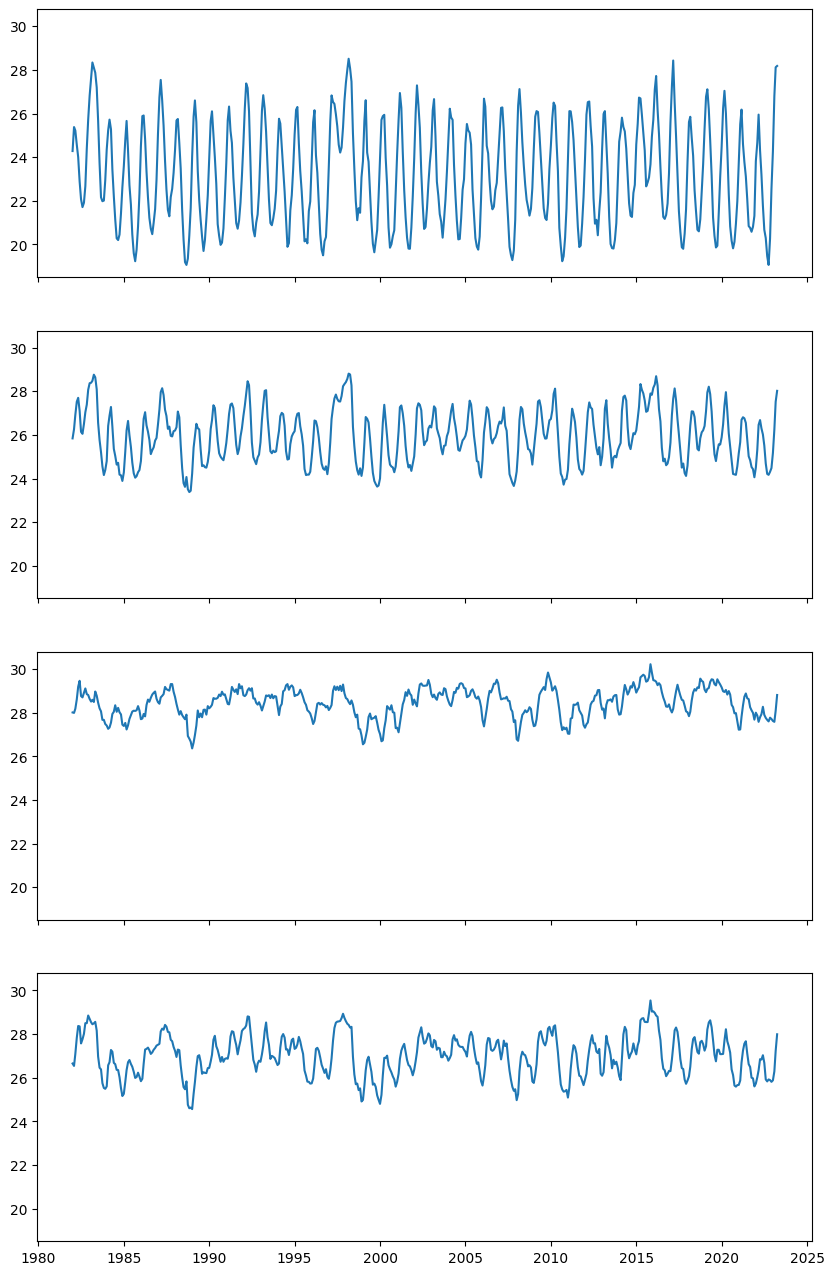

In [ ]:
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True,figsize=(10,16))
date=sstoi_df.index
axs[0].plot(date, sstoi_df['nino1+2'])
axs[1].plot(date, sstoi_df['nino3'])
axs[2].plot(date, sstoi_df['nino4'])
axs[3].plot(date, sstoi_df['nino3_4'])

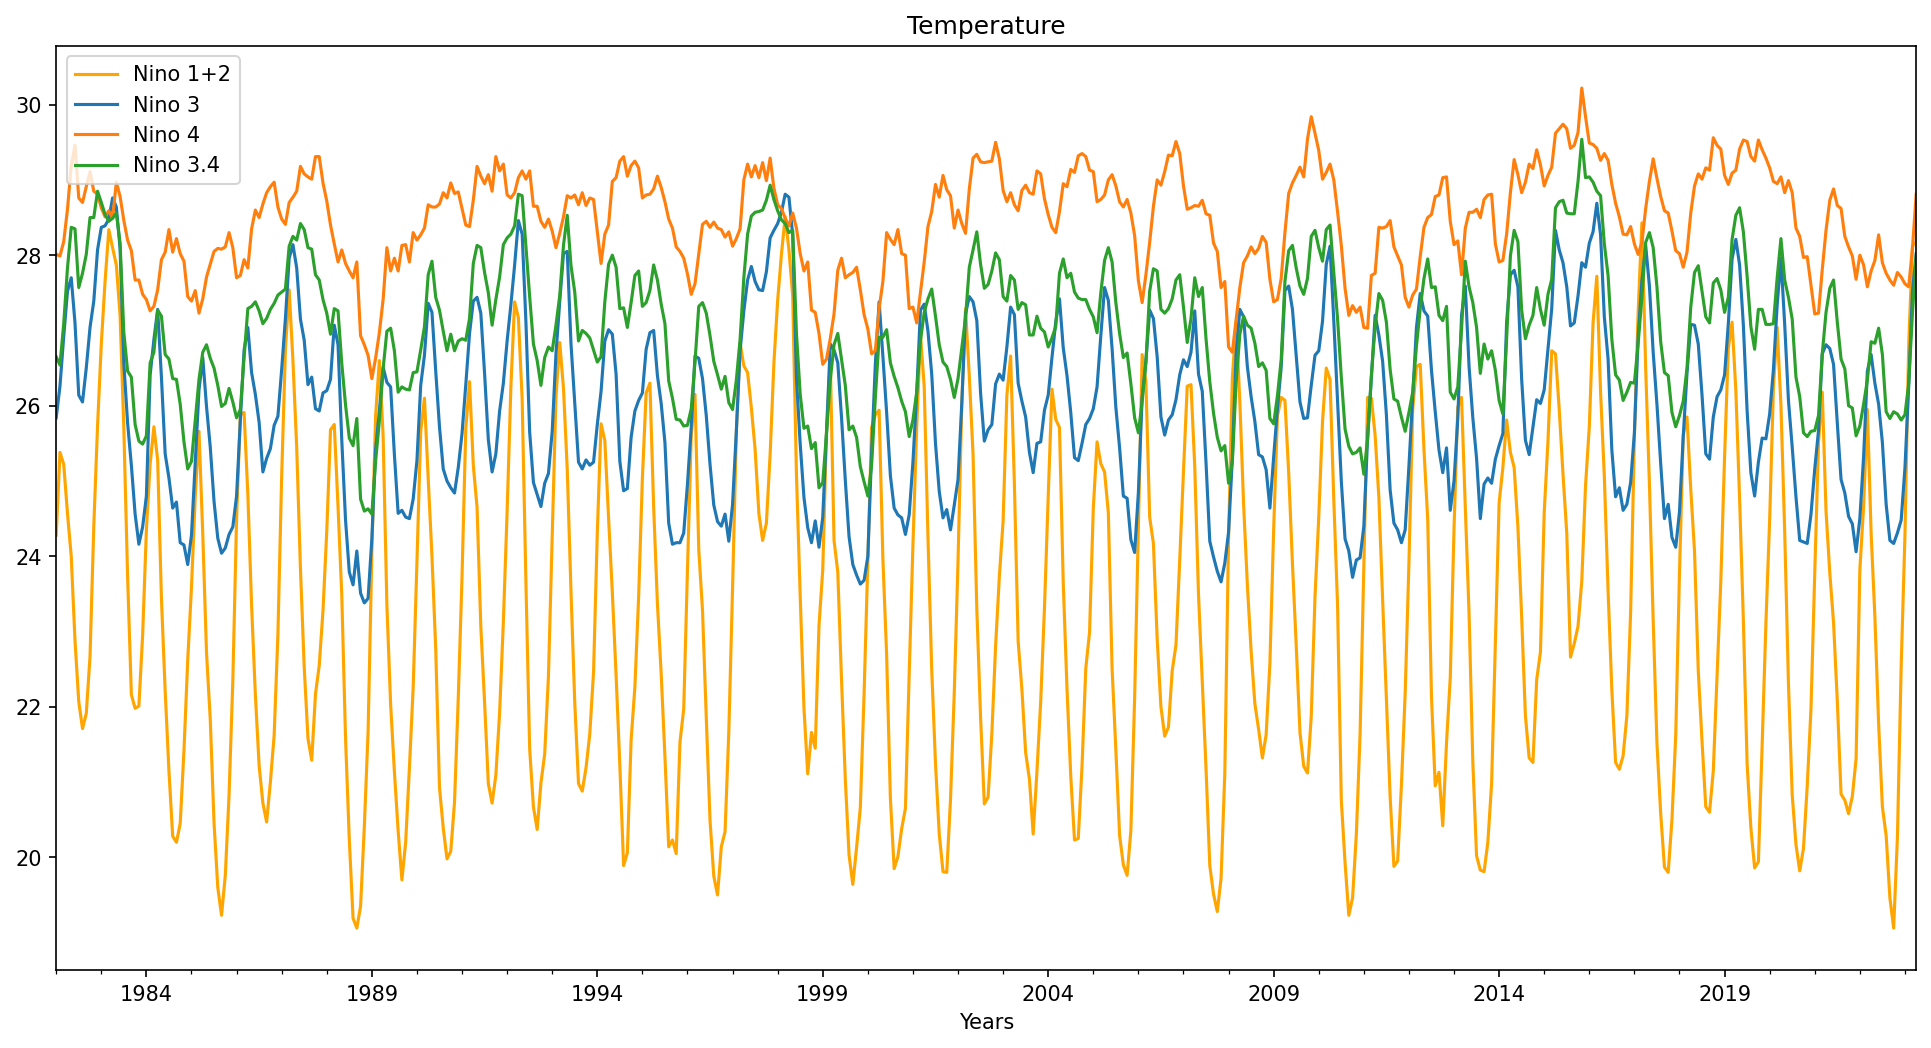

In [ ]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
sstoi_df['nino1+2'].plot(label='Nino 1+2', color='orange')
sstoi_df['nino3'].plot(label='Nino 3')
sstoi_df['nino4'].plot(label='Nino 4')
sstoi_df['nino3_4'].plot(label='Nino 3.4')
  
# adding title to the plot
plt.title('Temperature')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

## Limpieza de los Datos

### Valores Nulos



In [ ]:
sstoi_df.isna().sum()

nino1+2    0
anom1+2    0
nino3      0
anom3      0
nino4      0
anom4      0
nino3_4    0
anom3_4    0
dtype: int64

No existen valores nulos 

### Resumen estadístico

In [ ]:
sstoi_df.describe()

,nino1+2,anom1+2,nino3,anom3,nino4,anom4,nino3_4,anom3_4
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,23.238569,-0.059435,25.959617,-0.070262,28.448306,-0.103266,27.010464,-0.082903
std,2.325709,1.037774,1.229778,0.852488,0.678358,0.634563,0.942563,0.830024
min,19.060000,-1.900000,23.380000,-2.160000,26.360000,-1.870000,24.560000,-2.220000
25%,21.217500,-0.742500,24.980000,-0.652500,27.997500,-0.570000,26.337500,-0.670000
50%,23.125000,-0.250000,25.930000,-0.170000,28.555000,-0.020000,27.050000,-0.115000
75%,25.222500,0.440000,26.872500,0.402500,28.970000,0.370000,27.682500,0.440000
max,28.510000,4.030000,28.810000,3.070000,30.220000,1.550000,29.540000,2.720000


### Distribuciones

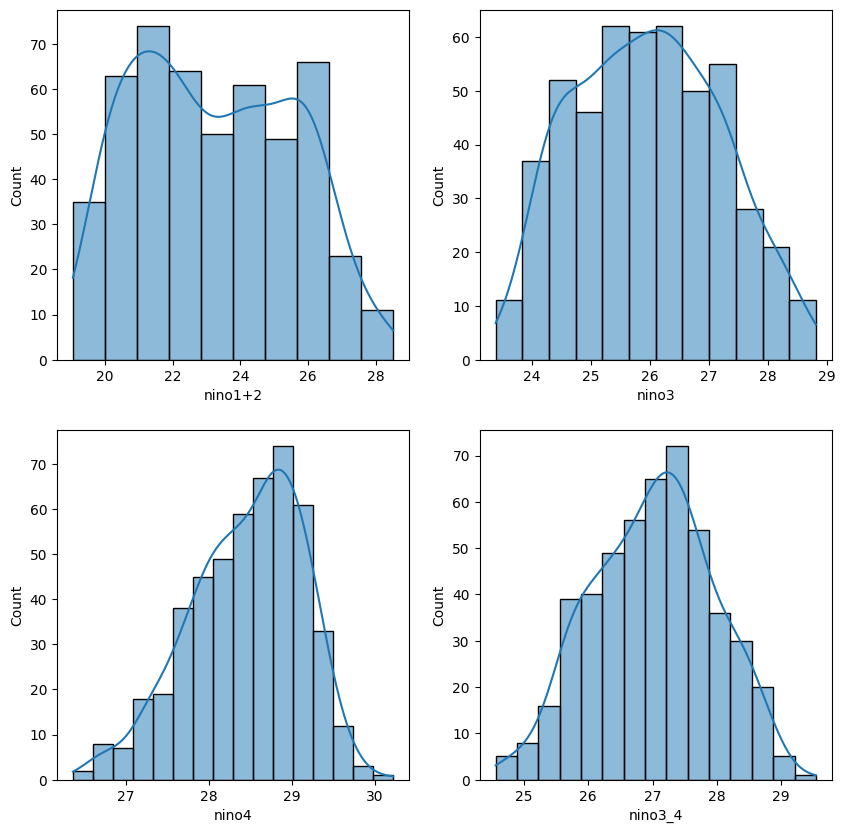

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(10, 10))

sns.histplot(sstoi_df['nino1+2'],ax=axes[0,0], kde=True)
sns.histplot(sstoi_df['nino3'],ax=axes[0,1], kde=True)
sns.histplot(sstoi_df['nino4'],ax=axes[1,0], kde=True)
sns.histplot(sstoi_df['nino3_4'],ax=axes[1,1], kde=True)

plt.show()

Pruebas de normalidad

In [ ]:
anderson(sstoi_df['nino1+2'],dist='norm')

AndersonResult(statistic=5.528067121749245, critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=23.238568548387097, scale=2.3257092254519334)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
anderson(sstoi_df['nino3'],dist='norm')

AndersonResult(statistic=1.8549064267608628, critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=25.95961693548387, scale=1.2297775336450347)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
anderson(sstoi_df['nino4'],dist='norm')

AndersonResult(statistic=2.956182659844842, critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=28.448306451612904, scale=0.6783580554192837)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
anderson(sstoi_df['nino3_4'],dist='norm')

AndersonResult(statistic=0.7318227174966978, critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=27.010463709677417, scale=0.9425628005728777)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

### Análisis de Correlación

#### Autocorrelación

In [ ]:
import statsmodels.api as sm

**Temperatura**

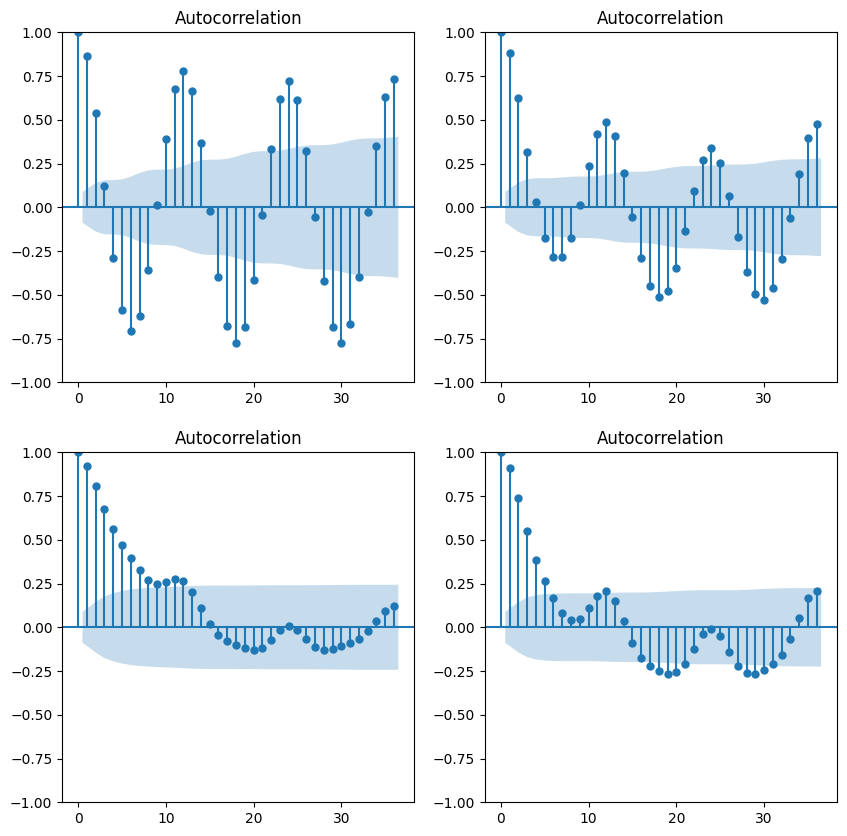

0.869278017261082
0.8862418735307973
0.9225530160231058
0.9116667727423039


In [ ]:
fig,axes=plt.subplots(2,2,figsize=(10, 10))
sm.graphics.tsa.plot_acf(sstoi_df['nino1+2'], lags=36,ax=axes[0,0])
sm.graphics.tsa.plot_acf(sstoi_df['nino3'], lags=36,ax=axes[0,1])
sm.graphics.tsa.plot_acf(sstoi_df['nino4'], lags=36,ax=axes[1,0])
sm.graphics.tsa.plot_acf(sstoi_df['nino3_4'], lags=36,ax=axes[1,1])

plt.show()

print(sstoi_df['nino1+2'].autocorr(lag=1))
print(sstoi_df['nino3'].autocorr(lag=1))
print(sstoi_df['nino4'].autocorr(lag=1))
print(sstoi_df['nino3_4'].autocorr(lag=1))


#### Correlacion entre variables

In [ ]:
#Matriz de correlación entre las mediciones de temperatura
corr_matrix1 = round(sstoi_df.corr(), 2)
print(corr_matrix1)

         nino1+2  anom1+2  nino3  anom3  nino4  anom4  nino3_4  anom3_4
nino1+2     1.00     0.44   0.78   0.35  -0.04   0.19     0.39     0.27
anom1+2     0.44     1.00   0.54   0.80   0.39   0.42     0.54     0.63
nino3       0.78     0.54   1.00   0.69   0.43   0.51     0.85     0.64
anom3       0.35     0.80   0.69   1.00   0.67   0.72     0.82     0.94
nino4      -0.04     0.39   0.43   0.67   1.00   0.93     0.80     0.82
anom4       0.19     0.42   0.51   0.72   0.93   1.00     0.78     0.88
nino3_4     0.39     0.54   0.85   0.82   0.80   0.78     1.00     0.87
anom3_4     0.27     0.63   0.64   0.94   0.82   0.88     0.87     1.00


### Características de las series de Tiempo

#### Estacionalidad y Tendencia

**Niño1+2**

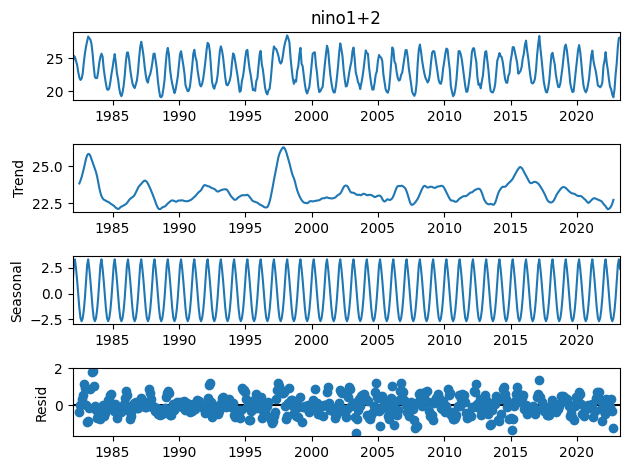

In [ ]:
seasonal_decompose(sstoi_df['nino1+2'], period=12).plot()
plt.show()

**Niño3**

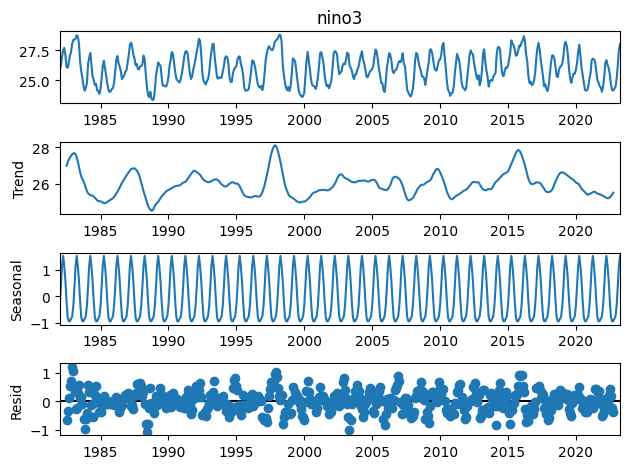

In [ ]:
seasonal_decompose(sstoi_df['nino3'], period=12).plot()
plt.show()

**Niño 4**

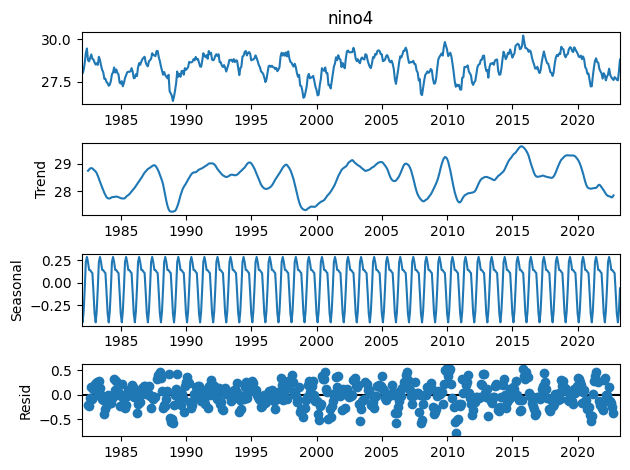

In [ ]:
seasonal_decompose(sstoi_df['nino4'], period=12).plot()
plt.show()

**Niño3.4**

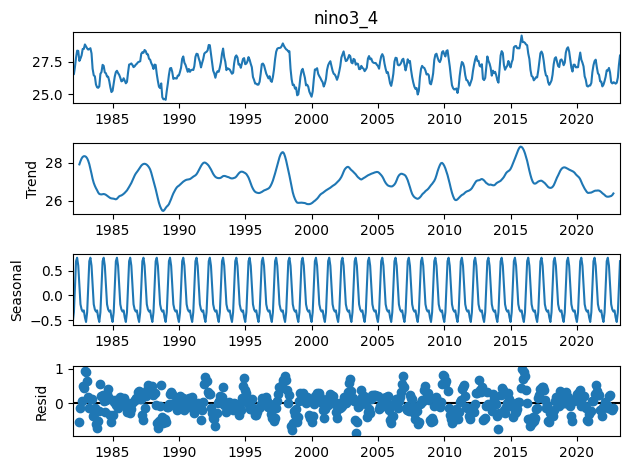

In [ ]:
seasonal_decompose(sstoi_df['nino3_4'], period=12).plot()
plt.show()

#### Estacionaridad

https://machinelearningmastery.com/time-series-data-stationary-python/

In [ ]:
from statsmodels.tsa.stattools import adfuller

**Niño1**

In [ ]:
result=adfuller(sstoi_df['nino1+2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.841658
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


**Niño 3**

In [ ]:
result=adfuller(sstoi_df['nino3'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.033099
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


**Niño 4**

In [ ]:
result=adfuller(sstoi_df['nino4'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.223398
p-value: 0.000601
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


**Ninño 3.4**

In [ ]:
result=adfuller(sstoi_df['nino3_4'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.193958
p-value: 0.000009
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


#### Periodicidad

https://periodicity.readthedocs.io

# Análisis Topológico

## Takens Embedding

In [ ]:
#Inicialización de parametros
max_periodic_dimension=22
max_periodic_time_delay=22
stride=12

In [ ]:
#Inicialización de la función search de SngleTakensEmbedding
embedder_periodic = SingleTakensEmbedding(parameters_type="search",time_delay=max_periodic_time_delay,
    dimension=max_periodic_dimension)

### **Optimización de Parámetros**

####Nino 1+2

**Takens Embedding Optimal Parameters con Stride 12**

In [ ]:
tau1,d1= takens_embedding_optimal_parameters(sstoi_df['nino1+2'], max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay Nino1+2: ', tau1,'\nOptimal dimension Nino1+2: ', d1, '\n')

Optimal time delay Nino1+2:  3 
Optimal dimension Nino1+2:  6 



**Función Search con Stride 1**

In [ ]:
nino1_2_embedded = embedder_periodic.fit_transform(sstoi_df['nino1+2'])
print("El delay encontrado es ", embedder_periodic.time_delay_)
print("La dimensión encontrada es ", embedder_periodic.dimension_)

El delay encontrado es  3
La dimensión encontrada es  8


**Busqueda de Óptimos locales con gráficas**

El delay óptimo es:  5


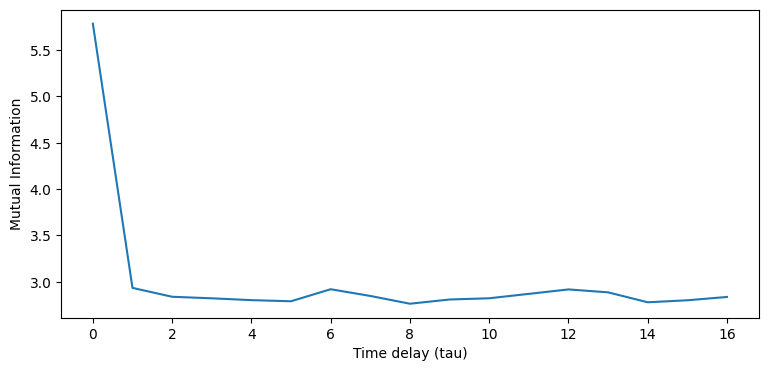

In [ ]:
plt.figure(figsize=(9,4))
plt.xlabel('Time delay (tau)')
plt.ylabel('Mutual Information')
plt.plot(delay.dmi(sstoi_df['nino1+2'], maxtau=17))

def find_optimal_delay(x, maxtau=50):
    mi = delay.dmi(x, maxtau=maxtau)
    diffmi = np.diff(mi)

    return np.where(diffmi > 0)[0][0]

print("El delay óptimo es: ", find_optimal_delay(sstoi_df['nino1+2'], maxtau=30))

La dimensión óptima con tau=5 es:  2


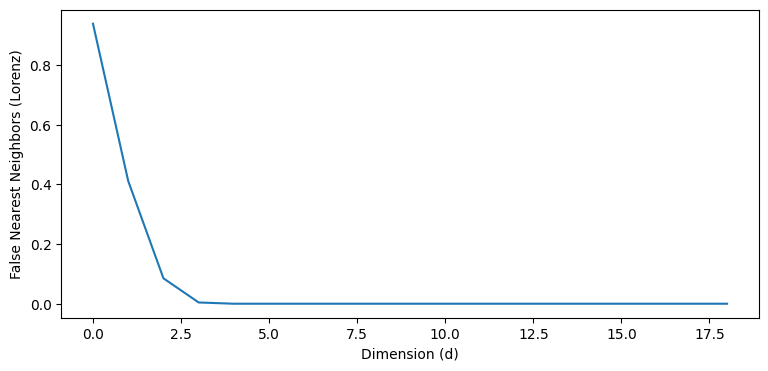

In [ ]:
test_dim = np.arange(1, 20)
f1, f2, f3 = dimension.fnn(x=sstoi_df['nino1+2'], 
                           dim=test_dim, 
                           tau=5, 
                           metric='euclidean')

plt.figure(figsize=(9,4))
plt.xlabel('Dimension (d)')
plt.ylabel('False Nearest Neighbors (Lorenz)')
plt.plot(f1)
print("La dimensión óptima con tau=5 es: ", [f<=0.1 for f in f1].index(True))

####Nino 1+2 Anom

**Takens Embedding Optimal Parameters con Stride 12**

In [ ]:
tau5,d5= takens_embedding_optimal_parameters(sstoi_df['anom1+2'], max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay anom1+2: ', tau5,'\nOptimal dimension anom1+2:', d5, '\n')

Optimal time delay anom1+2:  16 
Optimal dimension anom1+2: 3 



**Función Search con Stride 1**

In [ ]:
anom1_2_embedded = embedder_periodic.fit_transform(sstoi_df['anom1+2'])
print("El delay encontrado es ", embedder_periodic.time_delay_)
print("La dimensión encontrada es ", embedder_periodic.dimension_)

El delay encontrado es  16
La dimensión encontrada es  5


**Busqueda de Óptimos locales con gráficas**

El delay óptimo es:  5


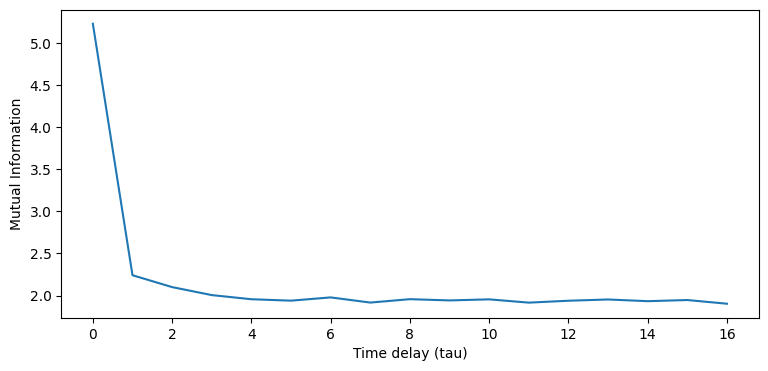

In [ ]:
plt.figure(figsize=(9,4))
plt.xlabel('Time delay (tau)')
plt.ylabel('Mutual Information')
plt.plot(delay.dmi(sstoi_df['anom1+2'], maxtau=17))

def find_optimal_delay(x, maxtau=50):
    mi = delay.dmi(x, maxtau=maxtau)
    diffmi = np.diff(mi)

    return np.where(diffmi > 0)[0][0]

print("El delay óptimo es: ", find_optimal_delay(sstoi_df['anom1+2'], maxtau=30))

La dimensión óptima con tau=5 es:  2


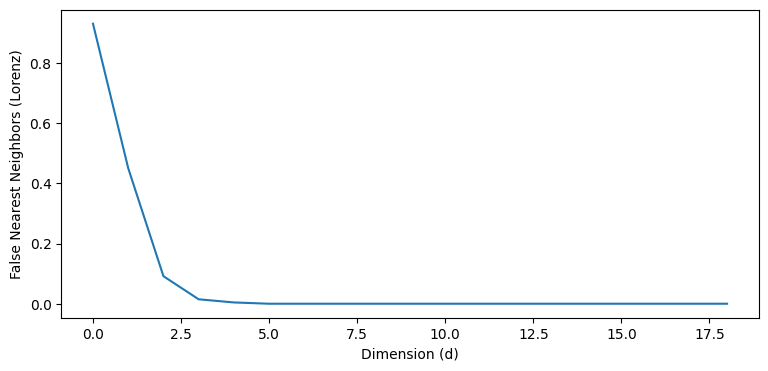

In [ ]:
test_dim = np.arange(1, 20)
f1, f2, f3 = dimension.fnn(x=sstoi_df['anom1+2'], 
                           dim=test_dim, 
                           tau=5, 
                           metric='euclidean')

plt.figure(figsize=(9,4))
plt.xlabel('Dimension (d)')
plt.ylabel('False Nearest Neighbors (Lorenz)')
plt.plot(f1)
print("La dimensión óptima con tau=5 es: ", [f<=0.1 for f in f1].index(True))

####Nino3

**Takens Embedding Optimal Parameters con Stride 12**

In [ ]:
tau2,d2= takens_embedding_optimal_parameters(sstoi_df['nino3'], max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay Nino3: ', tau2,'\nOptimal dimension Nino3: ', d2, '\n')

Optimal time delay Nino3:  15 
Optimal dimension Nino3:  3 



**Función Search con Stride 1**

In [ ]:
nino3_embedded = embedder_periodic.fit_transform(sstoi_df['nino3'])
print("El delay encontrado es ", embedder_periodic.time_delay_)
print("La dimensión encontrada es ", embedder_periodic.dimension_)

El delay encontrado es  15
La dimensión encontrada es  5


**Busqueda de Óptimos locales con gráficas**

El delay óptimo es:  2


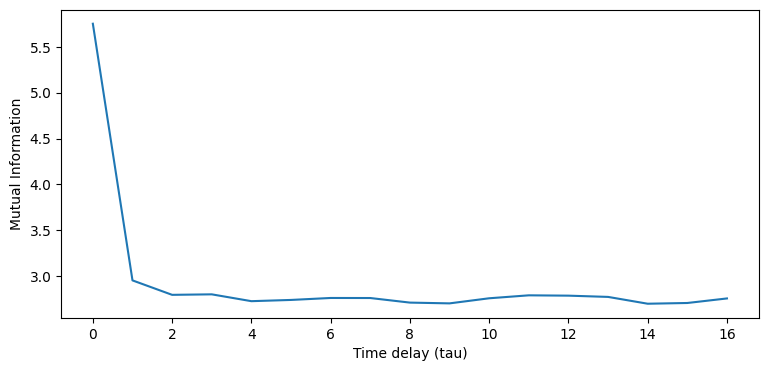

In [ ]:
plt.figure(figsize=(9,4))
plt.xlabel('Time delay (tau)')
plt.ylabel('Mutual Information')
plt.plot(delay.dmi(sstoi_df['nino3'], maxtau=17))

def find_optimal_delay(x, maxtau=50):
    mi = delay.dmi(x, maxtau=maxtau)
    diffmi = np.diff(mi)

    return np.where(diffmi > 0)[0][0]

print("El delay óptimo es: ", find_optimal_delay(sstoi_df['nino3'], maxtau=30))

La dimensión óptima con tau=2 es:  2


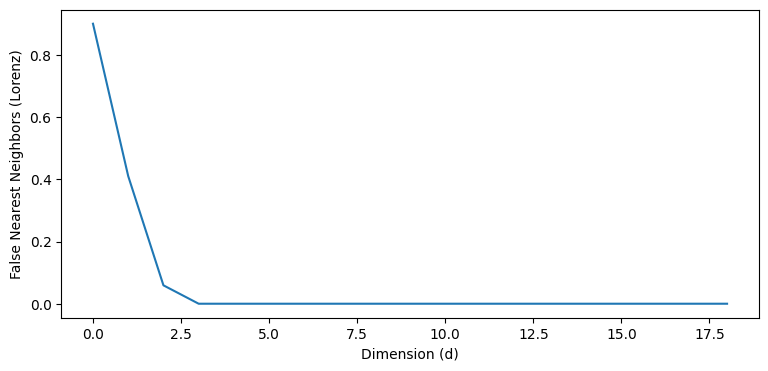

In [ ]:
test_dim = np.arange(1, 20)
f1, f2, f3 = dimension.fnn(x=sstoi_df['nino3'], 
                           dim=test_dim, 
                           tau=2, 
                           metric='euclidean')

plt.figure(figsize=(9,4))
plt.xlabel('Dimension (d)')
plt.ylabel('False Nearest Neighbors (Lorenz)')
plt.plot(f1)
print("La dimensión óptima con tau=2 es: ", [f<=0.1 for f in f1].index(True))

#### Nino3 Anom

**Takens Embedding Optimal Parameters con Stride 12**

In [ ]:
tau6,d6= takens_embedding_optimal_parameters(sstoi_df['anom3'], max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay Anom3: ', tau6,'\nOptimal dimension Anom3: ', d6, '\n')

Optimal time delay Anom3:  19 
Optimal dimension Anom3:  2 



**Función Search con Stride 1**

In [ ]:
anom3_embedded = embedder_periodic.fit_transform(sstoi_df['anom3'])
print("El delay encontrado es ", embedder_periodic.time_delay_)
print("La dimensión encontrada es ", embedder_periodic.dimension_)

El delay encontrado es  19
La dimensión encontrada es  6


**Busqueda de Óptimos locales con gráficas**

El delay óptimo es:  5


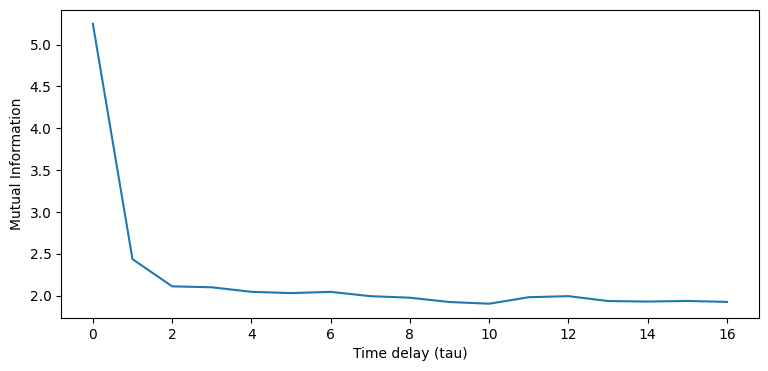

In [ ]:
plt.figure(figsize=(9,4))
plt.xlabel('Time delay (tau)')
plt.ylabel('Mutual Information')
plt.plot(delay.dmi(sstoi_df['anom3'], maxtau=17))

def find_optimal_delay(x, maxtau=50):
    mi = delay.dmi(x, maxtau=maxtau)
    diffmi = np.diff(mi)

    return np.where(diffmi > 0)[0][0]

print("El delay óptimo es: ", find_optimal_delay(sstoi_df['anom3'], maxtau=30))

La dimensión óptima con tau=5 es:  2


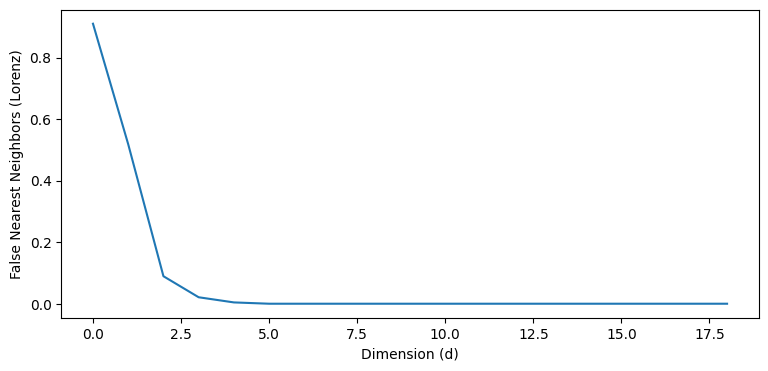

In [ ]:
test_dim = np.arange(1, 20)
f1, f2, f3 = dimension.fnn(x=sstoi_df['anom3'], 
                           dim=test_dim, 
                           tau=5, 
                           metric='euclidean')

plt.figure(figsize=(9,4))
plt.xlabel('Dimension (d)')
plt.ylabel('False Nearest Neighbors (Lorenz)')
plt.plot(f1)
print("La dimensión óptima con tau=5 es: ", [f<=0.1 for f in f1].index(True))

####Niño4

**Takens Embedding Optimal Parameters con Stride 12**

In [ ]:
tau3,d3= takens_embedding_optimal_parameters(sstoi_df['nino4'], max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay Nino4: ', tau3,'\nOptimal dimension Nino4: ', d3, '\n')

Optimal time delay Nino4:  6 
Optimal dimension Nino4:  2 



**Función Search con Stride 1**

In [ ]:
nino4_embedded = embedder_periodic.fit_transform(sstoi_df['nino4'])
print("El delay encontrado es ", embedder_periodic.time_delay_)
print("La dimensión encontrada es ", embedder_periodic.dimension_)

El delay encontrado es  6
La dimensión encontrada es  7


**Busqueda de Óptimos locales con gráficas**

El delay óptimo es:  6


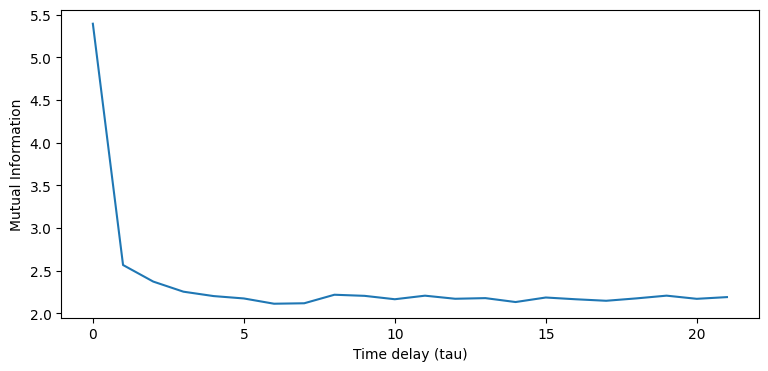

In [ ]:
plt.figure(figsize=(9,4))
plt.xlabel('Time delay (tau)')
plt.ylabel('Mutual Information')
plt.plot(delay.dmi(sstoi_df['nino4'], maxtau=22))

def find_optimal_delay(x, maxtau=50):
    mi = delay.dmi(x, maxtau=maxtau)
    diffmi = np.diff(mi)

    return np.where(diffmi > 0)[0][0]

print("El delay óptimo es: ", find_optimal_delay(sstoi_df['nino4'], maxtau=30))

La dimensión óptima con tau=6 es:  2


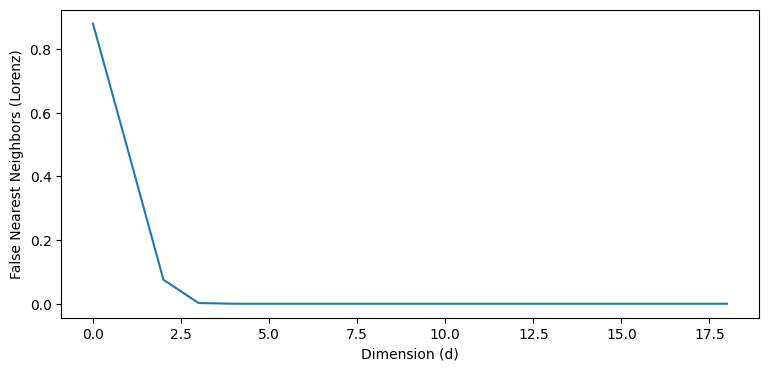

In [ ]:
test_dim = np.arange(1, 20)
f1, f2, f3 = dimension.fnn(x=sstoi_df['nino4'], 
                           dim=test_dim, 
                           tau=6, 
                           metric='euclidean')

plt.figure(figsize=(9,4))
plt.xlabel('Dimension (d)')
plt.ylabel('False Nearest Neighbors (Lorenz)')
plt.plot(f1)
print("La dimensión óptima con tau=6 es: ", [f<=0.1 for f in f1].index(True))

####Niño4 Anom

**Takens Embedding Optimal Parameters con Stride 12**

In [ ]:
tau7,d7= takens_embedding_optimal_parameters(sstoi_df['anom4'], max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay anom4: ', tau7,'\nOptimal dimension anom4: ', d7, '\n')

Optimal time delay anom4:  12 
Optimal dimension anom4:  3 



**Función Search con Stride 1**

In [ ]:
anom4_embedded = embedder_periodic.fit_transform(sstoi_df['anom4'])
print("El delay encontrado es ", embedder_periodic.time_delay_)
print("La dimensión encontrada es ", embedder_periodic.dimension_)

El delay encontrado es  12
La dimensión encontrada es  5


**Busqueda de Óptimos locales con gráficas**

El delay óptimo es:  4


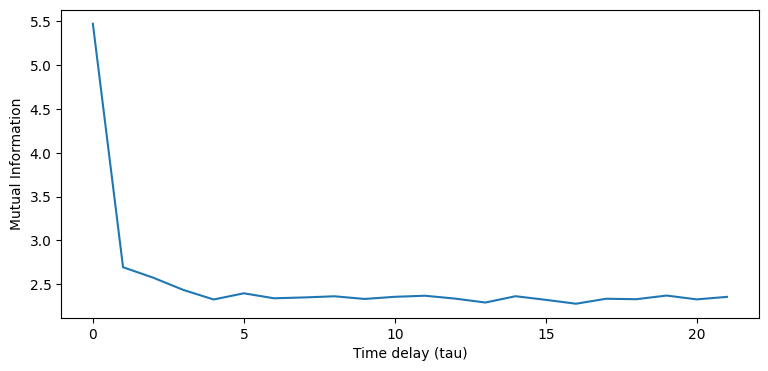

In [ ]:
plt.figure(figsize=(9,4))
plt.xlabel('Time delay (tau)')
plt.ylabel('Mutual Information')
plt.plot(delay.dmi(sstoi_df['anom4'], maxtau=22))

def find_optimal_delay(x, maxtau=50):
    mi = delay.dmi(x, maxtau=maxtau)
    diffmi = np.diff(mi)

    return np.where(diffmi > 0)[0][0]

print("El delay óptimo es: ", find_optimal_delay(sstoi_df['anom4'], maxtau=30))

La dimensión óptima con tau=4 es:  2


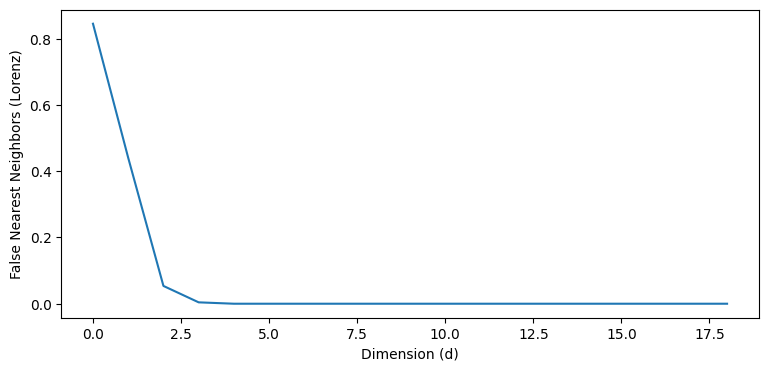

In [ ]:
test_dim = np.arange(1, 20)
f1, f2, f3 = dimension.fnn(x=sstoi_df['anom4'], 
                           dim=test_dim, 
                           tau=4, 
                           metric='euclidean')

plt.figure(figsize=(9,4))
plt.xlabel('Dimension (d)')
plt.ylabel('False Nearest Neighbors (Lorenz)')
plt.plot(f1)
print("La dimensión óptima con tau=4 es: ", [f<=0.1 for f in f1].index(True))

####Nino3_4

**Takens Embedding Optimal Parameters con Stride 12**

In [ ]:
tau4,d4= takens_embedding_optimal_parameters(sstoi_df['nino3_4'], max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay Nino3_4: ', tau4,'\nOptimal dimension NIno3_4: ', d4, '\n')

Optimal time delay Nino3_4:  17 
Optimal dimension NIno3_4:  3 



**Función Search con Stride 1**

In [ ]:
nino3_4_embedded = embedder_periodic.fit_transform(sstoi_df['nino3_4'])
print("El delay encontrado es ", embedder_periodic.time_delay_)
print("El delay encontrado es ", embedder_periodic.dimension_)

El delay encontrado es  17
El delay encontrado es  8


**Busqueda de Óptimos locales con gráficas**



El delay óptimo es:  4


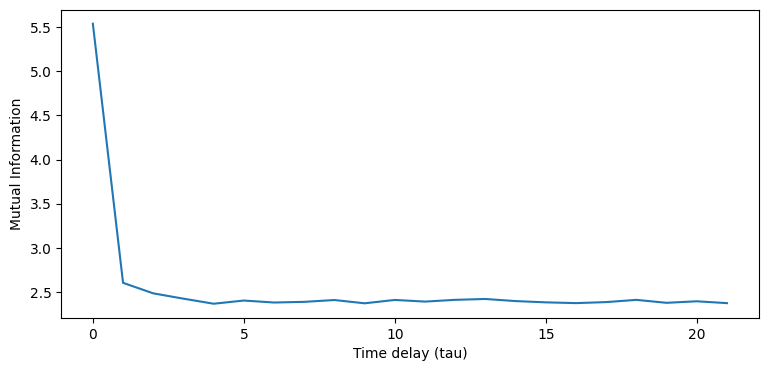

In [ ]:
plt.figure(figsize=(9,4))
plt.xlabel('Time delay (tau)')
plt.ylabel('Mutual Information')
plt.plot(delay.dmi(sstoi_df['nino3_4'], maxtau=22))

def find_optimal_delay(x, maxtau=50):
    mi = delay.dmi(x, maxtau=maxtau)
    diffmi = np.diff(mi)

    return np.where(diffmi > 0)[0][0]

print("El delay óptimo es: ", find_optimal_delay(sstoi_df['nino3_4'], maxtau=30))

La dimensión óptima con tau=4 es:  2


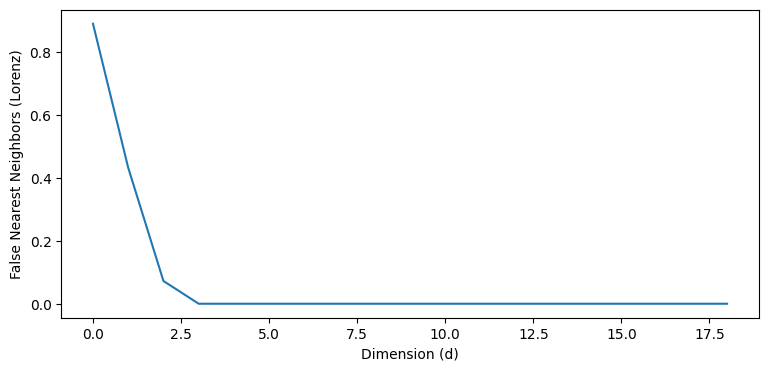

In [ ]:
test_dim = np.arange(1, 20)
f1, f2, f3 = dimension.fnn(x=sstoi_df['nino3_4'], 
                           dim=test_dim, 
                           tau=4, 
                           metric='euclidean')

plt.figure(figsize=(9,4))
plt.xlabel('Dimension (d)')
plt.ylabel('False Nearest Neighbors (Lorenz)')
plt.plot(f1)
print("La dimensión óptima con tau=4 es: ", [f<=0.1 for f in f1].index(True))

#### Anom3_4

**Takens Embedding Optimal Parameters con Stride 12**

In [ ]:
tau8,d8= takens_embedding_optimal_parameters(sstoi_df['anom3_4'], max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay anom3_4: ', tau8,'\nOptimal dimension anom3_4: ', d8, '\n')

Optimal time delay anom3_4:  14 
Optimal dimension anom3_4:  2 



**Función Search con Stride 1**

In [ ]:
anom3_4_embedded = embedder_periodic.fit_transform(sstoi_df['anom3_4'])
print("El delay encontrado es ", embedder_periodic.time_delay_)
print("El delay encontrado es ", embedder_periodic.dimension_)

El delay encontrado es  14
El delay encontrado es  6


**Busqueda de Óptimos locales con gráficas**



El delay óptimo es:  2


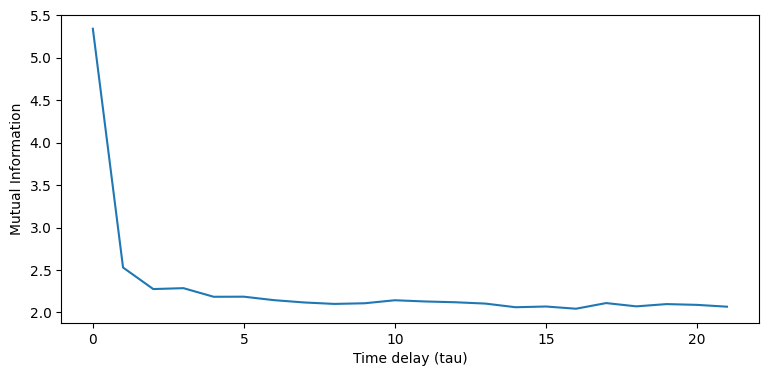

In [ ]:
plt.figure(figsize=(9,4))
plt.xlabel('Time delay (tau)')
plt.ylabel('Mutual Information')
plt.plot(delay.dmi(sstoi_df['anom3_4'], maxtau=22))

def find_optimal_delay(x, maxtau=50):
    mi = delay.dmi(x, maxtau=maxtau)
    diffmi = np.diff(mi)

    return np.where(diffmi > 0)[0][0]

print("El delay óptimo es: ", find_optimal_delay(sstoi_df['anom3_4'], maxtau=30))

La dimensión óptima con tau=2 es:  2


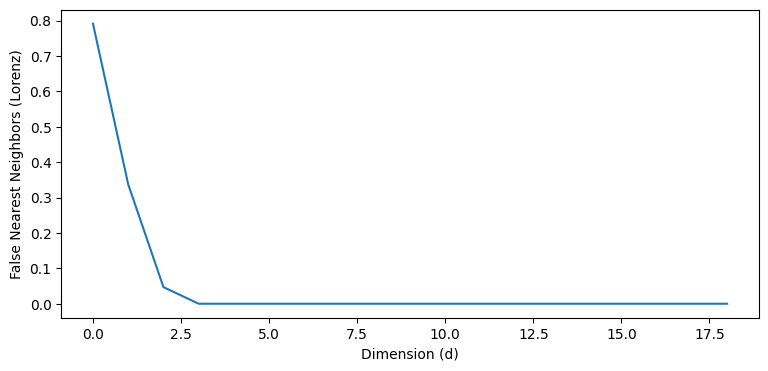

In [ ]:
test_dim = np.arange(1, 20)
f1, f2, f3 = dimension.fnn(x=sstoi_df['anom3_4'], 
                           dim=test_dim, 
                           tau=2, 
                           metric='euclidean')

plt.figure(figsize=(9,4))
plt.xlabel('Dimension (d)')
plt.ylabel('False Nearest Neighbors (Lorenz)')
plt.plot(f1)
print("La dimensión óptima con tau=2 es: ", [f<=0.1 for f in f1].index(True))

### **Embedding**

In [ ]:
#Funcion auxiliar para hacer el embedding
def embed2(points,dimemb=2,time_delay=100):
    auxembed=[]
    for i in range(0,len(points)+(-dimemb+1)*time_delay):
        aux=[points[i+j*time_delay] for j in range(dimemb)]
        auxembed.append(aux)
    auxembed=np.array(auxembed)
    return auxembed


#PCA para visualizar los que tienen dim>2
pca_viz = PCA(n_components=3)

#### Nino 1+2

In [ ]:
#Embedding con Función Auxiliar
#embed_nino1_2_2 =embed2(sstoi_df["nino1+2"],dimemb=8, time_delay=3) #Fncion Search
#embed_nino1_2_3 =embed2(sstoi_df["nino1+2"],dimemb=2, time_delay=5) #Optimos Locales

#Embeddinf con Librería
embedder_121 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=3,dimension=6,stride=12,)
nino12_embed1 = embedder_121.fit_transform(sstoi_df['nino1+2']) #TakensEmbeddingOptimalParameters
embedder_122 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=3,dimension=8,stride=1,)
nino12_embed2 = embedder_122.fit_transform(sstoi_df['nino1+2']) #Fncion Search
embedder_123 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=5,dimension=2,stride=1,)
nino12_embed3 = embedder_123.fit_transform(sstoi_df['nino1+2']) #Optimos Locales

#PCA para visualización
#embed_nino121a_viz = pca_viz.fit_transform(embed_nino1_2_2)
embed_nino121_viz = pca_viz.fit_transform(nino12_embed1)
embed_nino122_viz = pca_viz.fit_transform(nino12_embed2)

##### Visualizaciones

######**Delay 3, Dimensión 6, Stride 12**

In [ ]:
plot_point_cloud(embed_nino121_viz)

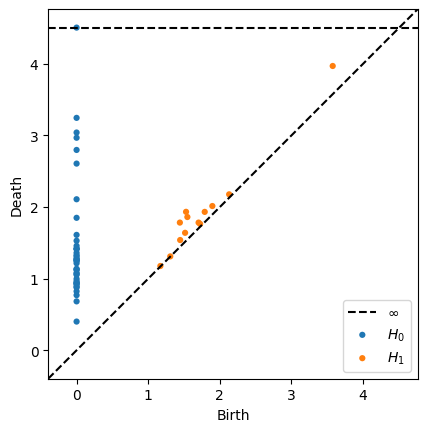

In [ ]:
ripsprueba=ripser.ripser(nino12_embed1)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

###### **Delay 3, Dimensión 8, Stride 1**

In [ ]:
plot_point_cloud(embed_nino122_viz)

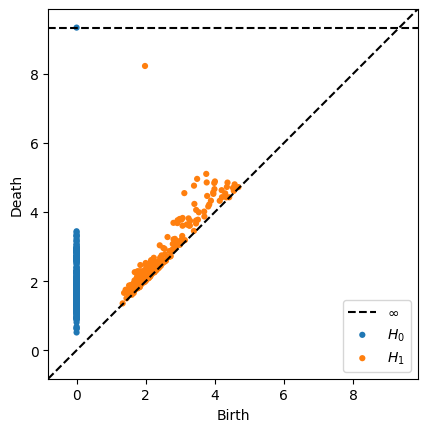

In [ ]:
ripsprueba=ripser.ripser(nino12_embed2)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

######**Delay 5, Dimensión 2, Stride 1**

In [ ]:
plot_point_cloud(nino12_embed3)

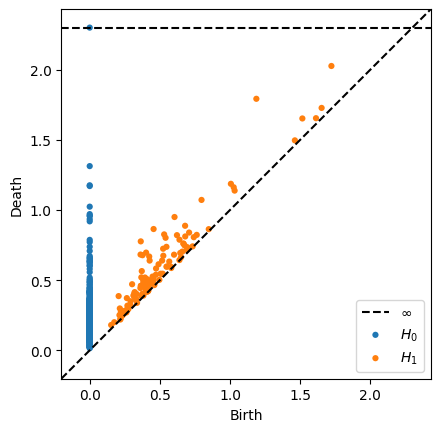

In [ ]:
ripsprueba=ripser.ripser(nino12_embed3)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

#### Anom 1+2

In [ ]:
#Embedding con Función Auxiliar
#embed_nino1_2_2 =embed2(sstoi_df["nino1+2"],dimemb=8, time_delay=3) #Fncion Search
#embed_nino1_2_3 =embed2(sstoi_df["nino1+2"],dimemb=2, time_delay=5) #Optimos Locales

#Embeddinf con Librería
embedder_anom121 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=16,dimension=3,stride=12,)
anom12_embed1 = embedder_anom121.fit_transform(sstoi_df['anom1+2']) #TakensEmbeddingOptimalParameters
embedder_anom122 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=16,dimension=5,stride=1,)
anom12_embed2 = embedder_anom122.fit_transform(sstoi_df['anom1+2']) #Fncion Search
embedder_anom123 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=5,dimension=2,stride=1,)
anom12_embed3 = embedder_anom123.fit_transform(sstoi_df['anom1+2']) #Optimos Locales

#PCA para visualización
#embed_nino121a_viz = pca_viz.fit_transform(embed_nino1_2_2)
embed_anom121_viz = pca_viz.fit_transform(anom12_embed1)
embed_anom122_viz = pca_viz.fit_transform(anom12_embed2)

##### Visualizaciones

######**Delay 16, Dimensión 3, Stride 12**

In [ ]:
plot_point_cloud(anom12_embed1)

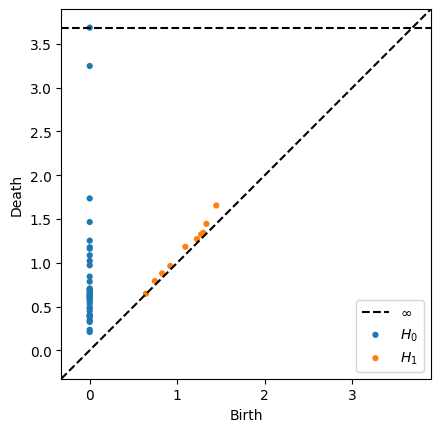

In [ ]:
ripsprueba=ripser.ripser(anom12_embed1)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

###### **Delay 16, Dimensión 5, Stride 1**

In [ ]:
plot_point_cloud(embed_anom122_viz)

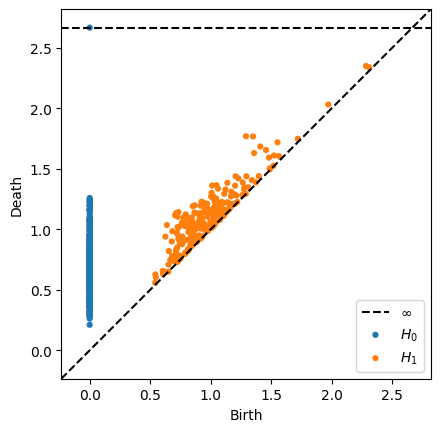

In [ ]:
ripsprueba=ripser.ripser(anom12_embed2)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

######**Delay 5, Dimensión 2, Stride 1**

In [ ]:
plot_point_cloud(anom12_embed3)

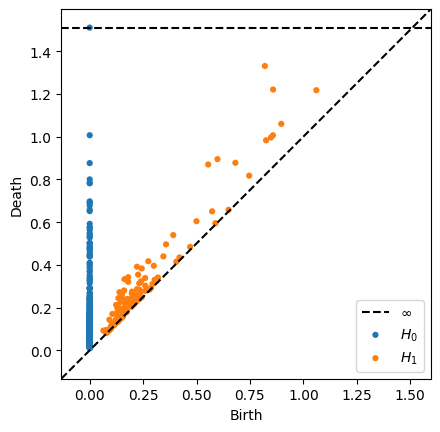

In [ ]:
ripsprueba=ripser.ripser(anom12_embed3)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

#### Nino 3

**Parametros a probar:**

*   Delay 15, Dimensión 3, Stride 12
* Delay 15, Dimensión 5, Stride 1
* Delay 2, Dimensión 2, Stride 1







In [ ]:
#Embedding con Función Auxiliar
#embed_nino3_2 =embed2(sstoi_df["nino3"],dimemb=8, time_delay=3) #Fncion Search
#embed_nino3_3 =embed2(sstoi_df["nino3"],dimemb=2, time_delay=5) #Optimos Locales

#Embeddinf con Librería
embedder_31 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=15,dimension=3,stride=12,)
nino3_embed1 = embedder_31.fit_transform(sstoi_df['nino3']) #TakensEmbeddingOptimalParameters
embedder_32 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=15,dimension=5,stride=1,)
nino3_embed2 = embedder_32.fit_transform(sstoi_df['nino3']) #Fncion Search
embedder_33 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=2,dimension=2,stride=1,)
nino3_embed3 = embedder_33.fit_transform(sstoi_df['nino3']) #Optimos Locales

#PCA para visualización
#embed_nino32a_viz = pca_viz.fit_transform(embed_nino3_2)
#embed_nino31_viz = pca_viz.fit_transform(nino3_embed1)
embed_nino32_viz = pca_viz.fit_transform(nino3_embed2)

##### Visualizaciones

######**Delay 15, Dimensión 3, Stride 12**

In [ ]:
plot_point_cloud(nino3_embed1)

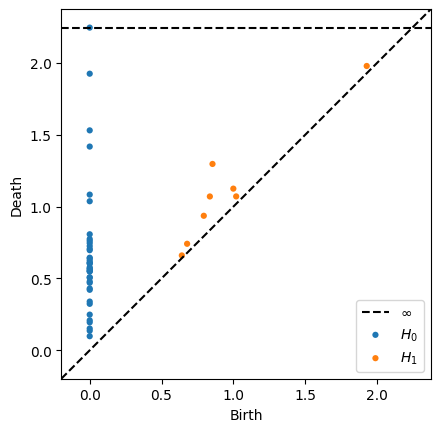

In [ ]:
ripsprueba=ripser.ripser(nino3_embed1)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

###### **Delay 15, Dimensión 5, Stride 1**

In [ ]:
plot_point_cloud(embed_nino32_viz)

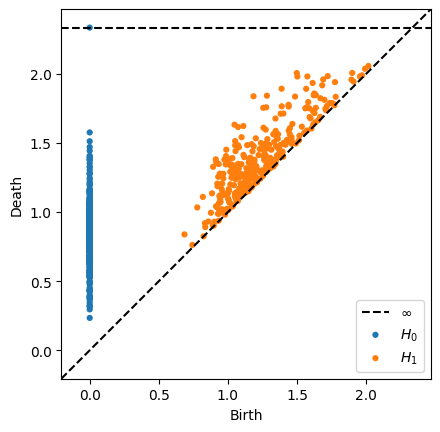

In [ ]:
ripsprueba=ripser.ripser(nino3_embed2)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

######**Delay 2, Dimensión 2, Stride 1**

In [ ]:
plot_point_cloud(nino3_embed3)

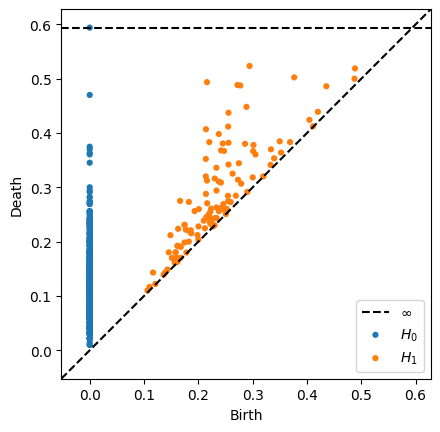

In [ ]:
ripsprueba=ripser.ripser(nino3_embed3)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

#### Anom 3

**Parametros a probar:**

*   Delay 19, Dimensión 2, Stride 12
* Delay 19, Dimensión 6, Stride 1
* Delay 5, Dimensión 2, Stride 1







In [ ]:
#Embedding con Función Auxiliar
#embed_nino3_2 =embed2(sstoi_df["nino3"],dimemb=8, time_delay=3) #Fncion Search
#embed_nino3_3 =embed2(sstoi_df["nino3"],dimemb=2, time_delay=5) #Optimos Locales

#Embeddinf con Librería
embedder_anom31 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=19,dimension=2,stride=12,)
anom3_embed1 = embedder_anom31.fit_transform(sstoi_df['anom3']) #TakensEmbeddingOptimalParameters
embedder_anom32 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=19,dimension=6,stride=1,)
anom3_embed2 = embedder_anom32.fit_transform(sstoi_df['anom3']) #Fncion Search
embedder_anom33 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=5,dimension=2,stride=1,)
anom3_embed3 = embedder_anom33.fit_transform(sstoi_df['anom3']) #Optimos Locales

#PCA para visualización
#embed_nino32a_viz = pca_viz.fit_transform(embed_nino3_2)
#embed_nino31_viz = pca_viz.fit_transform(nino3_embed1)
embed_anom32_viz = pca_viz.fit_transform(anom3_embed2)

##### Visualizaciones

######**Delay 19, Dimensión 2, Stride 12**

In [ ]:
plot_point_cloud(anom3_embed1)

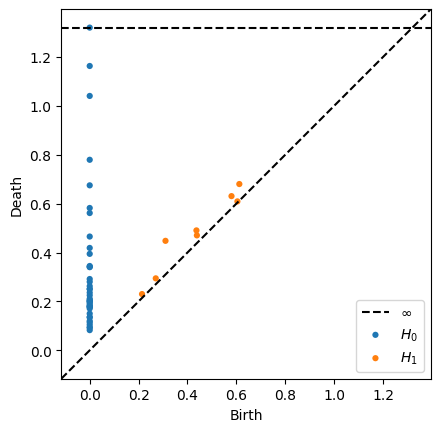

In [ ]:
ripsprueba=ripser.ripser(anom3_embed1)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

###### **Delay 19, Dimensión 6, Stride 1**

In [ ]:
plot_point_cloud(embed_anom32_viz)

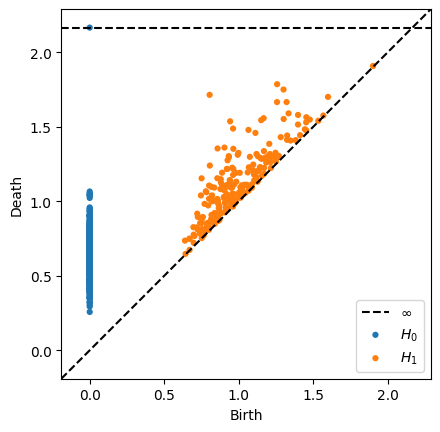

In [ ]:
ripsprueba=ripser.ripser(anom3_embed2)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

######**Delay 5, Dimensión 2, Stride 1**

In [ ]:
plot_point_cloud(anom3_embed3)

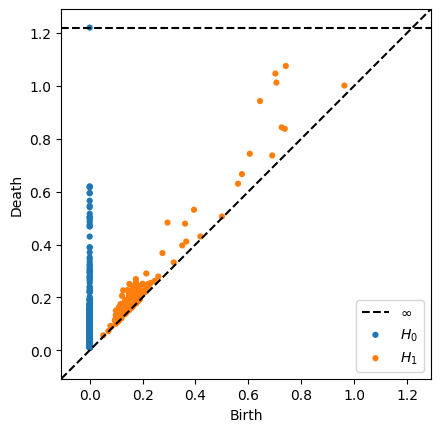

In [ ]:
ripsprueba=ripser.ripser(anom3_embed3)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

#### Nino 4

**Parametros a probar:**

*   Delay 6, Dimensión 2, Stride 12
* Delay 6, Dimensión 7, Stride 1
* Delay 6, Dimensión 2, Stride 1







In [ ]:
#Embedding con Función Auxiliar
#embed_nino4_2 =embed2(sstoi_df["nino4"],dimemb=8, time_delay=3) #Fncion Search
#embed_nino4_3 =embed2(sstoi_df["nino4"],dimemb=2, time_delay=5) #Optimos Locales

#Embeddinf con Librería
embedder_41 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=6,dimension=2,stride=12,)
nino4_embed1 = embedder_41.fit_transform(sstoi_df['nino4']) #TakensEmbeddingOptimalParameters
embedder_42 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=6,dimension=7,stride=1,)
nino4_embed2 = embedder_42.fit_transform(sstoi_df['nino4']) #Fncion Search
embedder_43 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=6,dimension=2,stride=1,)
nino4_embed3 = embedder_43.fit_transform(sstoi_df['nino4']) #Optimos Locales

#PCA para visualización
#embed_nino42a_viz = pca_viz.fit_transform(embed_nino4_2)
#embed_nino41_viz = pca_viz.fit_transform(nino4_embed1)
embed_nino42_viz = pca_viz.fit_transform(nino4_embed2)

##### Visualizaciones

######**Delay 6, Dimensión 2, Stride 12**

In [ ]:
plot_point_cloud(nino4_embed1)

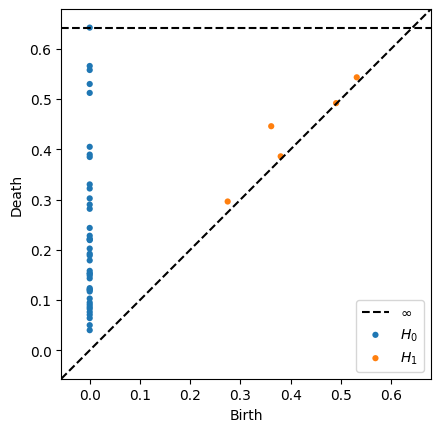

In [ ]:
ripsprueba=ripser.ripser(nino4_embed1)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

###### **Delay 6, Dimensión 7, Stride 1**

In [ ]:
plot_point_cloud(embed_nino42_viz)

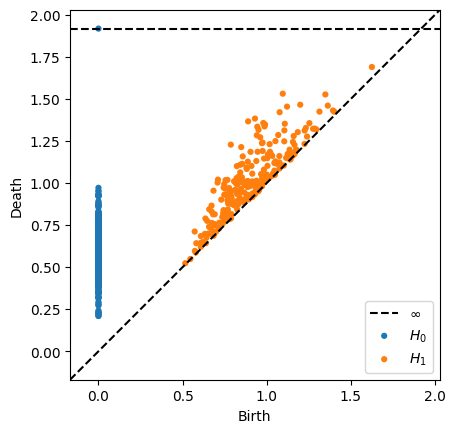

In [ ]:
ripsprueba=ripser.ripser(nino4_embed2)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

######**Delay 6, Dimensión 2, Stride 1**

In [ ]:
plot_point_cloud(nino4_embed3)

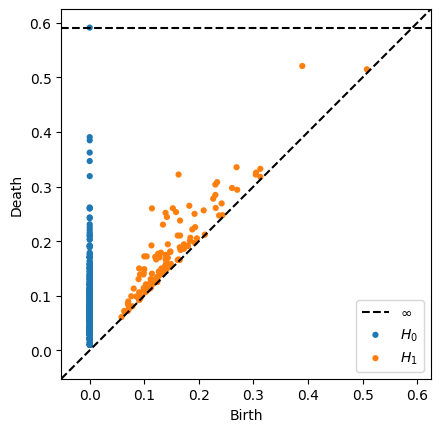

In [ ]:
ripsprueba=ripser.ripser(nino4_embed3)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

#### Anom 4

**Parametros a probar:**

* Delay 12, Dimensión 3, Stride 12
* Delay 12, Dimensión 5, Stride 1
* Delay 4, Dimensión 2, Stride 1







In [ ]:
#Embedding con Función Auxiliar
#embed_nino4_2 =embed2(sstoi_df["nino4"],dimemb=8, time_delay=3) #Fncion Search
#embed_nino4_3 =embed2(sstoi_df["nino4"],dimemb=2, time_delay=5) #Optimos Locales

#Embeddinf con Librería
embedder_anom41 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=12,dimension=3,stride=12,)
anom4_embed1 = embedder_anom41.fit_transform(sstoi_df['anom4']) #TakensEmbeddingOptimalParameters
embedder_anom42 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=12,dimension=5,stride=1,)
anom4_embed2 = embedder_anom42.fit_transform(sstoi_df['anom4']) #Fncion Search
embedder_anom43 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=4,dimension=2,stride=1,)
anom4_embed3 = embedder_anom43.fit_transform(sstoi_df['anom4']) #Optimos Locales

#PCA para visualización
#embed_nino42a_viz = pca_viz.fit_transform(embed_nino4_2)
#embed_nino41_viz = pca_viz.fit_transform(nino4_embed1)
embed_anom42_viz = pca_viz.fit_transform(anom4_embed2)

##### Visualizaciones

######**Delay 12, Dimensión 3, Stride 12**

In [ ]:
plot_point_cloud(anom4_embed1)

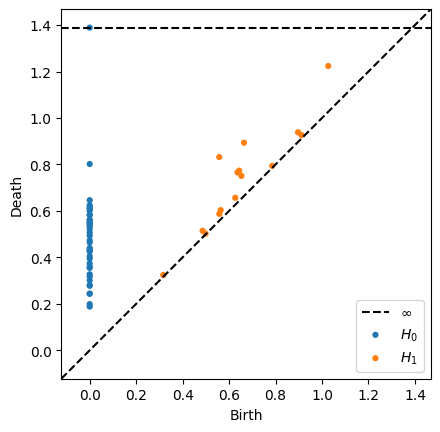

In [ ]:
ripsprueba=ripser.ripser(anom4_embed1)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

###### **Delay 12, Dimensión 5, Stride 1**

In [ ]:
plot_point_cloud(embed_anom42_viz)

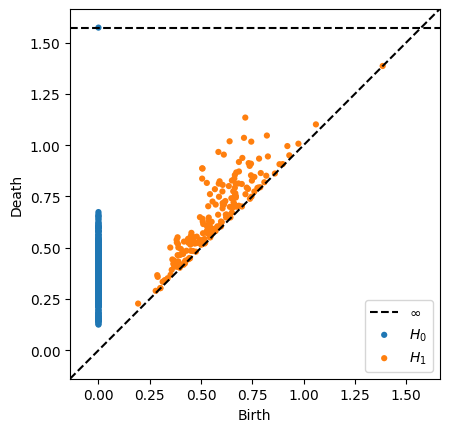

In [ ]:
ripsprueba=ripser.ripser(anom4_embed2)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

###### **Delay 4, Dimensión 2, Stride 1**

In [ ]:
plot_point_cloud(anom4_embed3)

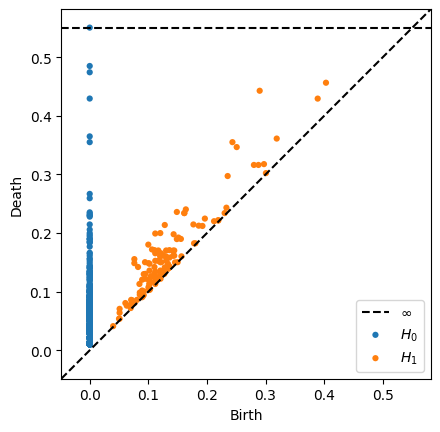

In [ ]:
ripsprueba=ripser.ripser(anom4_embed3)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

#### Nino 3_4

**Parametros a probar:**

*   Delay 17, Dimensión 3, Stride 12
* Delay 17, Dimensión 8, Stride 1
* Delay 4, Dimensión 2, Stride 1







In [ ]:
#Embedding con Función Auxiliar
#embed_nino34_2 =embed2(sstoi_df["nino3_4"],dimemb=8, time_delay=3) #Fncion Search
#embed_nino34_3 =embed2(sstoi_df["nino3_4"],dimemb=2, time_delay=5) #Optimos Locales

#Embeddinf con Librería
embedder_341 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=17,dimension=3,stride=12,)
nino34_embed1 = embedder_341.fit_transform(sstoi_df['nino3_4']) #TakensEmbeddingOptimalParameters
embedder_342 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=17,dimension=8,stride=1,)
nino34_embed2 = embedder_342.fit_transform(sstoi_df['nino3_4']) #Fncion Search
embedder_343 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=4,dimension=2,stride=1,)
nino34_embed3 = embedder_343.fit_transform(sstoi_df['nino3_4']) #Optimos Locales

#PCA para visualización
#embed_nino341a_viz = pca_viz.fit_transform(embed_nino34_2)
#embed_nino341_viz = pca_viz.fit_transform(nino34_embed1)
embed_nino342_viz = pca_viz.fit_transform(nino34_embed2)

##### Visualizaciones

######**Delay 17, Dimensión 3, Stride 12**

In [ ]:
plot_point_cloud(nino34_embed1)

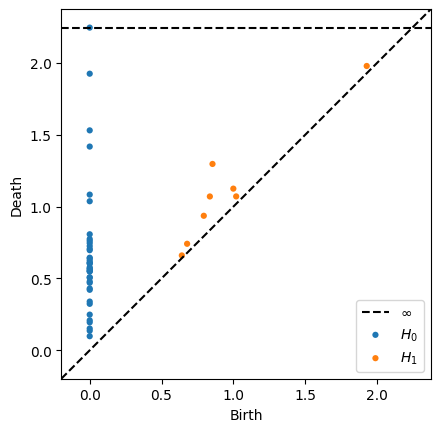

In [ ]:
ripsprueba=ripser.ripser(nino3_embed1)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

###### **Delay 17, Dimensión 8, Stride 1**

In [ ]:
plot_point_cloud(embed_nino342_viz)

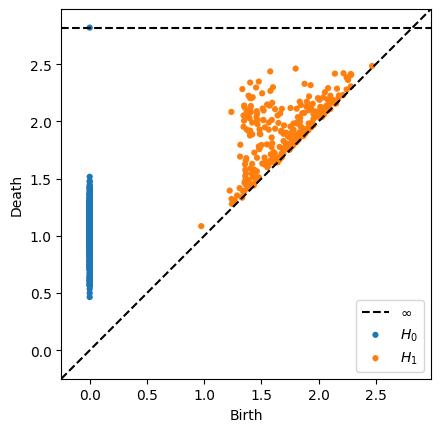

In [ ]:
ripsprueba=ripser.ripser(nino34_embed2)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

######**Delay 4, Dimensión 2, Stride 1**

In [ ]:
plot_point_cloud(nino34_embed3)

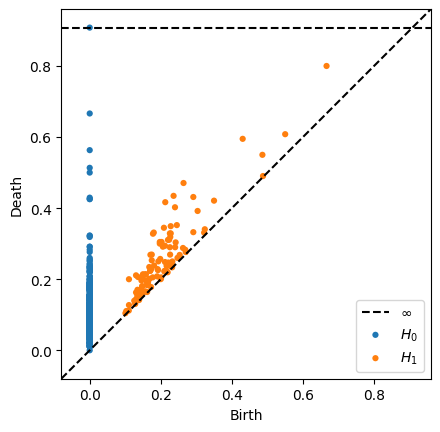

In [ ]:
ripsprueba=ripser.ripser(nino34_embed3)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

#### Anom 3_4

**Parametros a probar:**

*   Delay 14, Dimensión 2, Stride 12
* Delay 14, Dimensión 6, Stride 1
* Delay 2, Dimensión 2, Stride 1







In [ ]:
#Embedding con Función Auxiliar
#embed_nino34_2 =embed2(sstoi_df["nino3_4"],dimemb=8, time_delay=3) #Fncion Search
#embed_nino34_3 =embed2(sstoi_df["nino3_4"],dimemb=2, time_delay=5) #Optimos Locales

#Embeddinf con Librería
embedder_anom341 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=14,dimension=2,stride=12,)
anom34_embed1 = embedder_anom341.fit_transform(sstoi_df['anom3_4']) #TakensEmbeddingOptimalParameters
embedder_anom342 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=17,dimension=8,stride=1,)
anom34_embed2 = embedder_anom342.fit_transform(sstoi_df['anom3_4']) #Fncion Search
embedder_anom343 = SingleTakensEmbedding(parameters_type="fixed",n_jobs=None,time_delay=4,dimension=2,stride=1,)
anom34_embed3 = embedder_anom343.fit_transform(sstoi_df['anom3_4']) #Optimos Locales

#PCA para visualización
#embed_nino341a_viz = pca_viz.fit_transform(embed_nino34_2)
#embed_nino341_viz = pca_viz.fit_transform(nino34_embed1)
embed_anom342_viz = pca_viz.fit_transform(anom34_embed2)

##### Visualizaciones

######**Delay 14, Dimensión 2, Stride 12**

In [ ]:
plot_point_cloud(anom34_embed1)

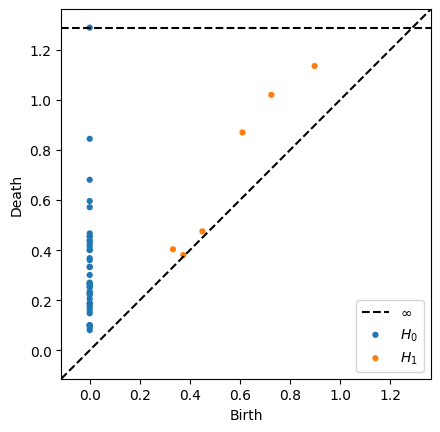

In [ ]:
ripsprueba=ripser.ripser(anom34_embed1)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

###### **Delay 14, Dimensión 6, Stride 1**

In [ ]:
plot_point_cloud(embed_anom342_viz)

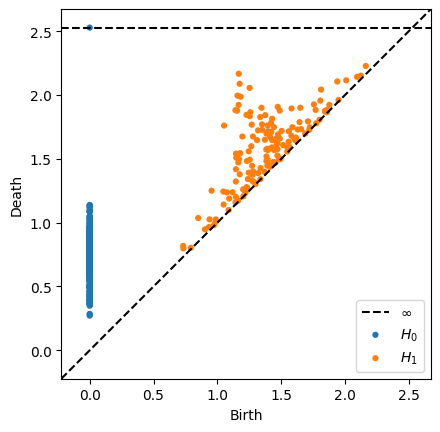

In [ ]:
ripsprueba=ripser.ripser(anom34_embed2)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

######**Delay 2, Dimensión 2, Stride 1**

In [ ]:
plot_point_cloud(anom34_embed3)

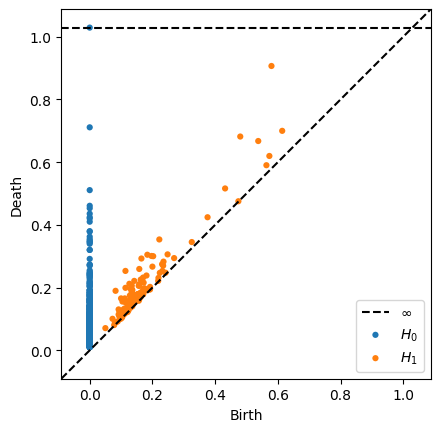

In [ ]:
ripsprueba=ripser.ripser(anom34_embed3)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

# Denoising (pendiente ordenarlo)

In [ ]:
def fft_denoiser(x, n_components, to_real=True):
    """Fast fourier transform denoiser.
    
    Denoises data using the fast fourier transform.
    
    Parameters
    ----------
    x : numpy.array
        The data to denoise.
    n_components : int
        The value above which the coefficients will be kept.
    to_real : bool, optional, default: True
        Whether to remove the complex part (True) or not (False)
        
    Returns
    -------
    clean_data : numpy.array
        The denoised data.
        
    References
    ----------
    .. [1] Steve Brunton - Denoising Data with FFT[Python]
       https://www.youtube.com/watch?v=s2K1JfNR7Sc&ab_channel=SteveBrunton
    
    """
    n = len(x)
    
    # compute the fft
    fft = np.fft.fft(x, n)
    
    # compute power spectrum density
    # squared magnitud of each fft coefficient
    PSD = fft * np.conj(fft) / n
    
    # keep high frequencies
    _mask = PSD > n_components
    fft = _mask * fft
    
    # inverse fourier transform
    clean_data = np.fft.ifft(fft)
    
    if to_real:
        clean_data = clean_data.real
    
    return clean_data

In [ ]:
sstoi_df

,nino1+2,anom1+2,nino3,anom3,nino4,anom4,nino3_4,anom3_4
date,,,,,,,,
1982-01-01,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08
1982-02-01,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.20
1982-03-01,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14
1982-04-01,24.57,-1.16,27.52,-0.05,28.61,0.10,27.83,0.02
1982-05-01,24.00,-0.62,27.70,0.49,29.19,0.40,28.37,0.49
...,...,...,...,...,...,...,...,...
2022-12-01,22.54,-0.30,24.48,-0.78,27.71,-0.73,25.81,-0.84
2023-01-01,24.27,-0.24,25.17,-0.50,27.62,-0.60,25.88,-0.69
2023-02-01,26.80,0.71,26.25,-0.13,27.58,-0.52,26.29,-0.44


In [ ]:
nino3_denoised =fft_denoiser(sstoi_df['nino3'], 0.1)
nino4_denoised =fft_denoiser(sstoi_df['nino4'], 0.1)
nino34_denoised =fft_denoiser(sstoi_df['nino3_4'], 0.1)
denoised_df=sstoi_df[['nino1+2', 'nino3', 'nino4', 'nino3_4']]

denoised_df['nino3_d'] = nino3_denoised.tolist()
denoised_df['nino34_d'] = nino34_denoised.tolist()
denoised_df['nino4_d'] = nino4_denoised.tolist()

denoised_df

<ipython-input-123-7a2c71d30c9d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-7a2c71d30c9d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-7a2c71d30c9d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nino1+2,nino3,nino4,nino3_4,nino3_d,nino34_d,nino4_d
date,,,,,,,
1982-01-01,24.28,25.84,28.01,26.65,26.451847,27.020275,28.251870
1982-02-01,25.38,26.26,27.99,26.54,26.283054,26.825357,28.292962
1982-03-01,25.22,26.92,28.18,27.09,26.836361,27.096313,28.423341
1982-04-01,24.57,27.52,28.61,27.83,27.556229,27.796576,28.676809
1982-05-01,24.00,27.70,29.19,28.37,27.501856,28.202228,28.930653
...,...,...,...,...,...,...,...
2022-12-01,22.54,24.48,27.71,25.81,24.372256,25.769974,27.730194
2023-01-01,24.27,25.17,27.62,25.88,25.120880,25.958627,27.671080
2023-02-01,26.80,26.25,27.58,26.29,26.350695,26.468353,27.746854


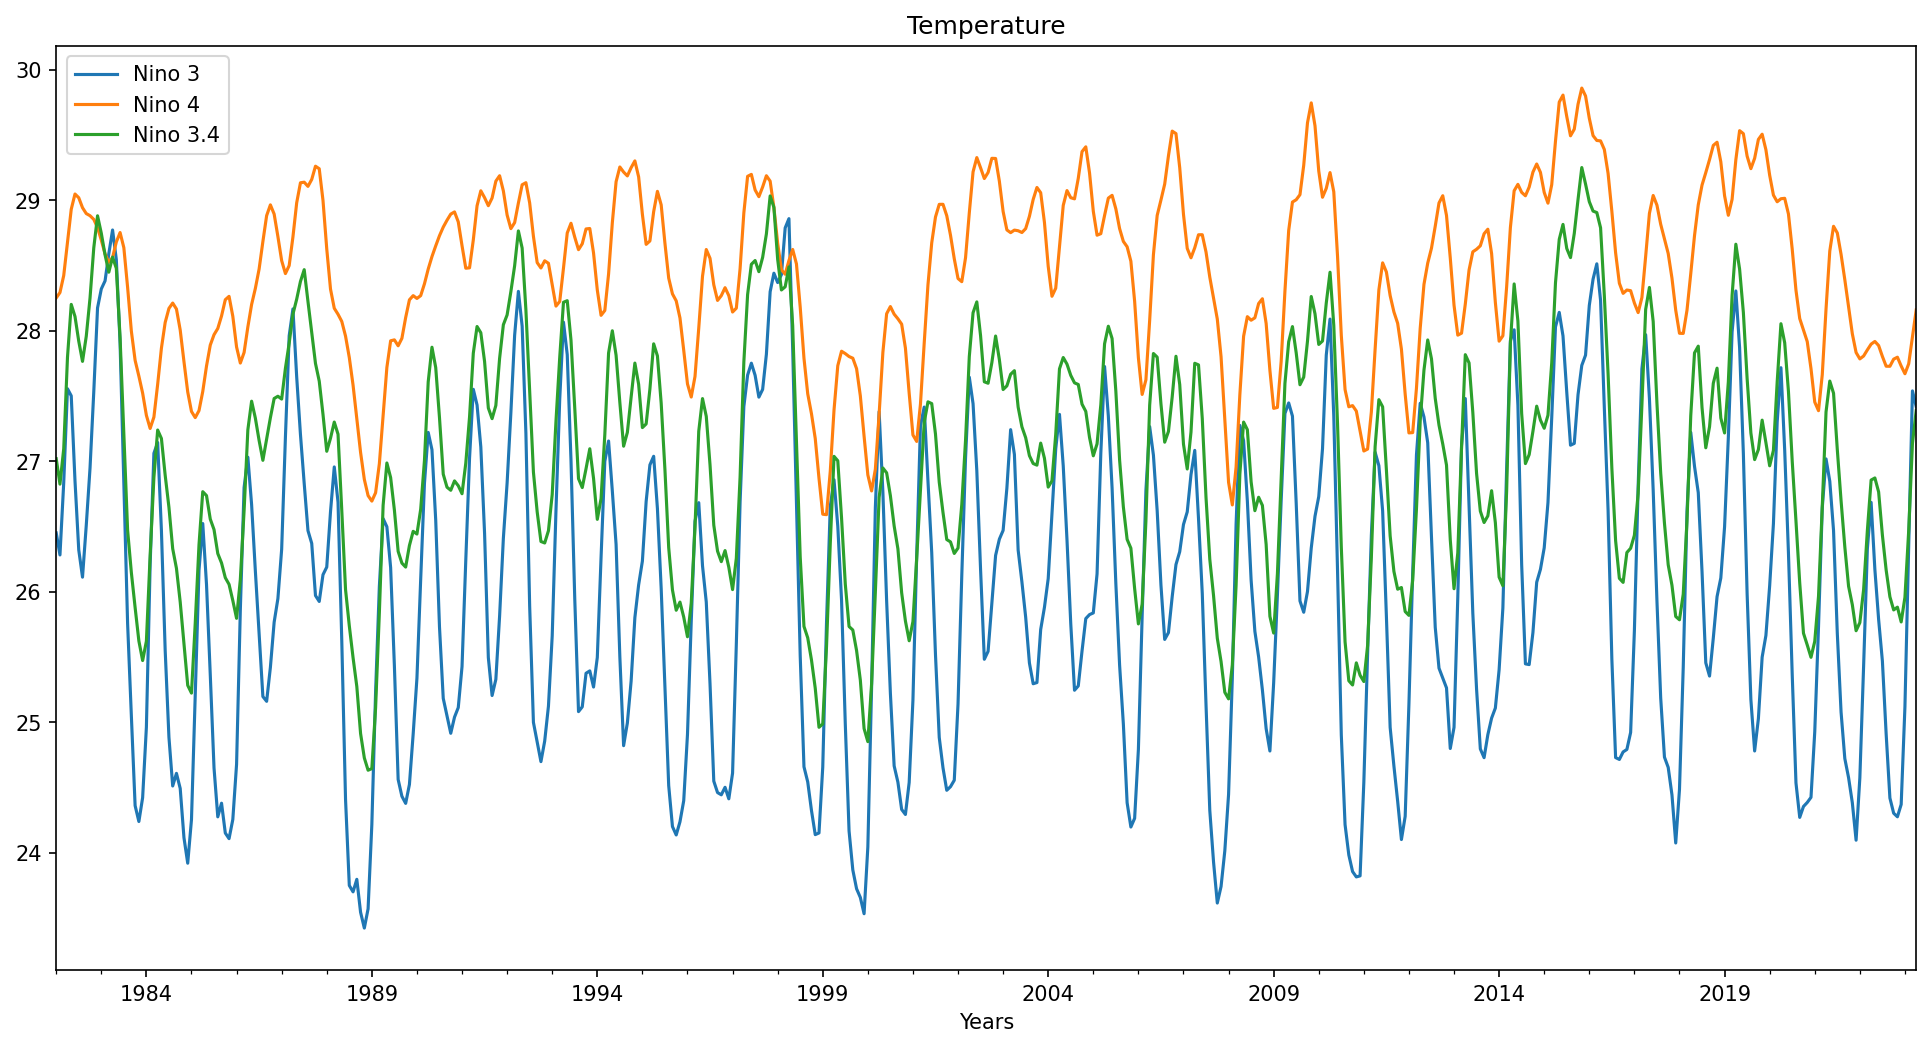

In [ ]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
#denoised_df['nino1+2_d'].plot(label='Nino 1+2', color='orange')
denoised_df['nino3_d'].plot(label='Nino 3')
denoised_df['nino4_d'].plot(label='Nino 4')
denoised_df['nino34_d'].plot(label='Nino 3.4')
  
# adding title to the plot
plt.title('Temperature')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [ ]:
print('                           ','delay', 'dimensions')
print('Parametros Nino3_4 suavizado',takens_embedding_optimal_parameters(denoised_df['nino34_d'],  max_time_delay=30, max_dimension=20))
print('Parametros Nino4 suavizado',takens_embedding_optimal_parameters(denoised_df['nino4_d'],  max_time_delay=30, max_dimension=20))
print('Parametros Nino3 suavizado',takens_embedding_optimal_parameters(denoised_df['nino3_d'],  max_time_delay=30, max_dimension=20))

                            delay dimensions
Parametros Nino3_4 suavizado (7, 7)
Parametros Nino4 suavizado (7, 5)
Parametros Nino3 suavizado (9, 6)


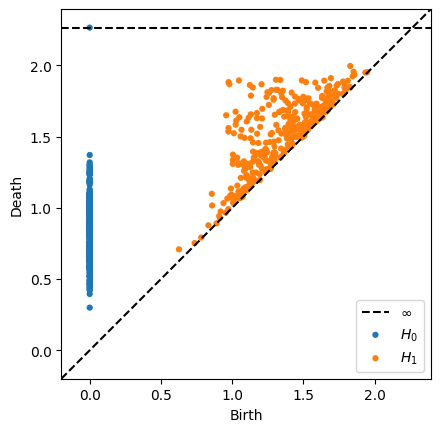

In [ ]:

embeded_reto=embed2(denoised_df['nino34_d'],dimemb=7, time_delay=7)

#df_PCA_normalized = (embeded_reto - pca_data_txt.mean()) / pca_data_txt.std()
pca = PCA(n_components=3)
retoEmbedded = pca.fit_transform(embeded_reto)

# Reformat and view results
#loadings = pd.DataFrame(pca4.components_.T, columns=['PC%s' % _ for _ in range(len(df_normalized2.columns))],index=(pca_data_txt.columns))
#print(loadings)

plot_point_cloud(retoEmbedded)

ripsprueba=ripser.ripser(embeded_reto)['dgms']
persim.plot_diagrams(
    ripsprueba, 
    show=True)

In [ ]:
embeded_reto=embed2(denoised_df['nino4_d'],dimemb=5, time_delay=7)

#df_PCA_normalized = (embeded_reto - pca_data_txt.mean()) / pca_data_txt.std()
pca = PCA(n_components=3)
retoEmbedded = pca.fit_transform(embeded_reto)

# Reformat and view results
#loadings = pd.DataFrame(pca4.components_.T, columns=['PC%s' % _ for _ in range(len(df_normalized2.columns))],index=(pca_data_txt.columns))
#print(loadings)

plot_point_cloud(retoEmbedded)

In [ ]:

embeded_reto=embed2(denoised_df['nino3_d'],dimemb=6, time_delay=9)

#df_PCA_normalized = (embeded_reto - pca_data_txt.mean()) / pca_data_txt.std()
pca = PCA(n_components=3)
retoEmbedded = pca.fit_transform(embeded_reto)

# Reformat and view results
#loadings = pd.DataFrame(pca4.components_.T, columns=['PC%s' % _ for _ in range(len(df_normalized2.columns))],index=(pca_data_txt.columns))
#print(loadings)

plot_point_cloud(retoEmbedded)

# Mapper

In [ ]:
!pip install kmapper
!pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=c8606a1599e6d4188bafb054aa8e0ac69ff3442ce59768733a0b45ab0eb611d2
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
import yfinance as yf
import kmapper as km
from kmapper.jupyter import display
import umap #Uniform Manifold Approximation and Projection for Dimension Reduction
import sklearn
import sklearn.manifold as manifold #https://scikit-learn.org/stable/modules/manifold.html
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sstoi_df

,nino1+2,anom1+2,nino3,anom3,nino4,anom4,nino3_4,anom3_4
date,,,,,,,,
1982-01-01,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08
1982-02-01,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.20
1982-03-01,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14
1982-04-01,24.57,-1.16,27.52,-0.05,28.61,0.10,27.83,0.02
1982-05-01,24.00,-0.62,27.70,0.49,29.19,0.40,28.37,0.49
...,...,...,...,...,...,...,...,...
2022-12-01,22.54,-0.30,24.48,-0.78,27.71,-0.73,25.81,-0.84
2023-01-01,24.27,-0.24,25.17,-0.50,27.62,-0.60,25.88,-0.69
2023-02-01,26.80,0.71,26.25,-0.13,27.58,-0.52,26.29,-0.44


In [ ]:
avgs_df=sstoi_df
avgs_df['avg1+2']= (sstoi_df['nino1+2']+sstoi_df['anom1+2'])
avgs_df['avg3']= (sstoi_df['nino3']+sstoi_df['anom3'])
avgs_df['avg4']= (sstoi_df['nino4']+sstoi_df['anom4'])
avgs_df['avg3_4']= (sstoi_df['nino3_4']+sstoi_df['anom3_4'])
avgs_df

,nino1+2,anom1+2,nino3,anom3,nino4,anom4,nino3_4,anom3_4,avg1+2,avg3,avg4,avg3_4
date,,,,,,,,,,,,
1982-01-01,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08,24.04,26.01,27.80,26.73
1982-02-01,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.20,24.66,26.15,27.88,26.34
1982-03-01,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14,23.84,26.67,28.13,26.95
1982-04-01,24.57,-1.16,27.52,-0.05,28.61,0.10,27.83,0.02,23.41,27.47,28.71,27.85
1982-05-01,24.00,-0.62,27.70,0.49,29.19,0.40,28.37,0.49,23.38,28.19,29.59,28.86
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,22.54,-0.30,24.48,-0.78,27.71,-0.73,25.81,-0.84,22.24,23.70,26.98,24.97
2023-01-01,24.27,-0.24,25.17,-0.50,27.62,-0.60,25.88,-0.69,24.03,24.67,27.02,25.19
2023-02-01,26.80,0.71,26.25,-0.13,27.58,-0.52,26.29,-0.44,27.51,26.12,27.06,25.85


In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model =  IsolationForest(contamination=0.05)

In [ ]:
model.fit(avgs_df[['nino3_4']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.05)

In [ ]:
model.predict(pruebadf[['nino3_4']])

NameError: ignored

In [ ]:
pruebadf= avgs_df
pruebadf['outliers']=(model.predict(pruebadf[['nino3_4']]))
pruebadf['c2'] = np.where(pruebadf.c1 == 8,'X', df.c3)
pruebadf


In [ ]:
pruebadf.info()

In [ ]:
# convierta pandas dataframe a numpy array, estandaricemos los datos y transpongamos el array
data = mapper_df.to_numpy()
data = data-np.mean(data, axis=0)/np.std(data, axis=0)
data = data.transpose()
data

In [ ]:
# initializa mapper
mapper = km.KeplerMapper(verbose=1)

In [ ]:
!pip install umap-learn

In [ ]:
import umap.umap_ as umap

In [ ]:
# proyecta los datos a dos dimensiones usando dos transformaciones:
# Coordenada 1 isomap https://en.wikipedia.org/wiki/Isomap
# Coordenada 2 UMAP https://arxiv.org/abs/1802.03426
projected_data = mapper.fit_transform(data, projection=[manifold.Isomap(n_neighbors=2,n_components=2, n_jobs=-1), umap.UMAP(n_components=2,random_state=1)])

In [ ]:
# clusterizar los datos using DBSCAN
# Checar los distintos métodos de clusterización https://scikit-learn.org/stable/modules/clustering.html
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.DBSCAN(metric="cosine"))

# Next Steps



*   Comparar diagramas de persistencia de los denoised con los noised (bottleneck distance)
*   Agregar sliding windows y probar periodicidad por intervalos de tiempo
*   Checar mapper, esperamos 3-4 clusters, función de proyección - =sklearn.manifold.TSNE()
*   Agregar datos de presión de la NOAA y hacer mapper
*   Hacer ARIMA vs SlidingWindows+Takens+Amplitude+RFRegressor https://giotto-ai.github.io/gtda-docs/latest/notebooks/time_series_forecasting.html#univariate-time-series-takensembedding-and-singletakensembedding
*   Checar viabilidad de una detección de anomalías con Mapper
*   Checar denoised con KNN en lugar de fourier

